In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
#sns.set(style="darkgrid")
import sys
sys.path.append('./..')
from refuelplot import *
setup()

import statsmodels.api as sm

In [3]:
rp_usa = '/data/users/kgruber/results/USA'
rp_usa2 = '/data/users/kgruber/results/USA/results_GWA2'
rp_bra = '/data/users/kgruber/results/BRA'
rp_bra2 = '/data/users/kgruber/results/BRA/results_GWA2'

# prepare USA

load results USA GWA3

In [4]:
results_USA_m = pd.read_csv(rp_usa + '/stats_USAm2010.csv',index_col=0)
results_BPA_m = pd.read_csv(rp_usa + '/stats_BPAm2010.csv',index_col=0)
results_BPA_d = pd.read_csv(rp_usa + '/stats_BPAd2010.csv',index_col=0)
results_BPA_h = pd.read_csv(rp_usa + '/stats_BPAh2010.csv',index_col=0)
results_NE_m = pd.read_csv(rp_usa + '/stats_NEm2010.csv',index_col=0)
results_TX_d = pd.read_csv(rp_usa + '/stats_TXd2010.csv',index_col=0)
results_TX_h = pd.read_csv(rp_usa + '/stats_TXh2010.csv',index_col=0)
results_states_m = pd.read_csv(rp_usa + '/stats_statesm2010.csv',index_col=[0,1])
results_regions_m = pd.read_csv(rp_usa + '/stats_regionsm2010.csv',index_col=[0,1])

load results USA GWA2

In [5]:
results_USA_m2 = pd.read_csv(rp_usa2 + '/stats_USAm2010.csv',index_col=0)
results_BPA_m2 = pd.read_csv(rp_usa2 + '/stats_BPAm2010.csv',index_col=0)
results_BPA_d2 = pd.read_csv(rp_usa2 + '/stats_BPAd2010.csv',index_col=0)
results_BPA_h2 = pd.read_csv(rp_usa2 + '/stats_BPAh2010.csv',index_col=0)
results_NE_m2 = pd.read_csv(rp_usa2 + '/stats_NEm2010.csv',index_col=0)
results_TX_d2 = pd.read_csv(rp_usa2 + '/stats_TXd2010.csv',index_col=0)
results_TX_h2 = pd.read_csv(rp_usa2 + '/stats_TXh2010.csv',index_col=0)
results_states_m2 = pd.read_csv(rp_usa2 + '/stats_statesm2010.csv',index_col=[0,1])
results_regions_m2 = pd.read_csv(rp_usa2 + '/stats_regionsm2010.csv',index_col=[0,1])

load correlations of regions USA

In [5]:
cors_usa = pd.read_csv(rp_usa + '/correlations_wind_19y.csv',index_col=0).drop([2,59]) # drop 2,59 - what is it? new england?

merge results and tidy

In [6]:
def prep_USAres(rdf,region):
    r = rdf.reset_index().melt(id_vars=['index']).dropna()
    r.columns = ['param','dataset',region]
    r = r.set_index(['param','dataset']).transpose()
    return(r)

In [7]:
def prep_USAstares(region):
    rdf = results_states_m.loc[region]
    rdf.index.name = 'index'
    return(prep_USAres(rdf,region))

def prep_USAregres(region):
    rdf = results_regions_m.loc[region]
    rdf.index.name = 'index'
    return(prep_USAres(rdf,region))

def prep_USAstares2(region):
    rdf = results_states_m2.loc[region]
    rdf.index.name = 'index'
    return(prep_USAres(rdf,region))

def prep_USAregres2(region):
    rdf = results_regions_m2.loc[region]
    rdf.index.name = 'index'
    return(prep_USAres(rdf,region))

In [8]:
rUSAm = prep_USAres(results_USA_m,'USA')
rUSAm2 = prep_USAres(results_USA_m2,'USA')
rBPAm = prep_USAres(results_BPA_m,'BPA')
rBPAm2 = prep_USAres(results_BPA_m2,'BPA')
rBPAd = prep_USAres(results_BPA_d,'BPA')
rBPAd2 = prep_USAres(results_BPA_d2,'BPA')
rBPAh = prep_USAres(results_BPA_h,'BPA')
rBPAh2 = prep_USAres(results_BPA_h2,'BPA')
rNEm = prep_USAres(results_NE_m,'NE')
rNEm2 = prep_USAres(results_NE_m2,'NE')
rTXd = prep_USAres(results_TX_d,'TX')
rTXd2 = prep_USAres(results_TX_d2,'TX')
rTXh = prep_USAres(results_TX_h,'TX')
rTXh2 = prep_USAres(results_TX_h2,'TX')
rSTAm = pd.concat(pd.Series(results_states_m.index.get_level_values(0).unique()).apply(prep_USAstares).tolist(),axis=0)
rSTAm2 = pd.concat(pd.Series(results_states_m2.index.get_level_values(0).unique()).apply(prep_USAstares2).tolist(),axis=0)
rREGm = pd.concat(pd.Series(results_regions_m.index.get_level_values(0).unique()).apply(prep_USAregres).tolist(),axis=0)
rREGm2 = pd.concat(pd.Series(results_regions_m2.index.get_level_values(0).unique()).apply(prep_USAregres2).tolist(),axis=0)

In [9]:
results_USA = pd.concat([rUSAm,rUSAm2,rBPAm,rBPAm2,rBPAd,rBPAd2,rBPAh,rBPAh2,rTXd,rTXd2,rTXh,rTXh2,rSTAm,rSTAm2,rREGm,rREGm2],axis=0)

In [10]:
results_USA.index = pd.MultiIndex.from_frame(pd.DataFrame({'country':'USA',
              'scale':['country']*2+['subsystem']*6+['state']*(len(rSTAm)+2)*2+['subsystem']*2*len(rREGm),
              'temp':['m','m','m','m','d','d','h','h','d','d','h','h']+['m']*2*(len(rSTAm)+len(rREGm)),
              'region':results_USA.index.values,
              'GWA':['GWA3','GWA2']*6+np.repeat(['GWA3','GWA2'],len(rSTAm)).tolist()+
                      np.repeat(['GWA3','GWA2'],len(rREGm)).tolist()}))

In [11]:
results_USA_tidy = results_USA.reset_index().melt(id_vars=['country','scale','region','temp','GWA'])

In [12]:
results_USA.to_pickle(rp_usa + '/results_USA_summary.pkl')
results_USA_tidy.to_pickle(rp_usa + '/results_USA_tidy_summary.pkl')

# prepare BRA

load results BRA GWA3

In [13]:
rBRAm = pd.read_csv(rp_bra + '/stats_BRAm.csv',index_col=0,header=[0,1])
rBRAd = pd.read_csv(rp_bra + '/stats_BRAd.csv',index_col=0,header=[0,1])
rBRAh = pd.read_csv(rp_bra + '/stats_BRAh.csv',index_col=0,header=[0,1])
rSUBm = pd.read_csv(rp_bra + '/stats_SUBm.csv',index_col=[0,1]).transpose()
rSUBd = pd.read_csv(rp_bra + '/stats_SUBd.csv',index_col=0,header=[0,1])
rSUBh = pd.read_csv(rp_bra + '/stats_SUBh.csv',index_col=0,header=[0,1])
rESTm = pd.read_csv(rp_bra + '/stats_ESTm.csv',index_col=[0,1]).transpose()
rESTd = pd.read_csv(rp_bra + '/stats_ESTd.csv',index_col=[0,1]).transpose()
rESTh = pd.read_csv(rp_bra + '/stats_ESTh.csv',index_col=[0,1]).transpose()
rUSIm = pd.read_csv(rp_bra + '/stats_USIm.csv',index_col=[0,1]).transpose()
rUSId = pd.read_csv(rp_bra + '/stats_USId.csv',index_col=[0,1]).transpose()
rUSIh = pd.read_csv(rp_bra + '/stats_USIh.csv',index_col=[0,1]).transpose()

load results BRA GWA2

In [14]:
rBRAm2 = pd.read_csv(rp_bra2 + '/stats_BRAm.csv',index_col=0,header=[0,1])
rBRAd2 = pd.read_csv(rp_bra2 + '/stats_BRAd.csv',index_col=0,header=[0,1])
rBRAh2 = pd.read_csv(rp_bra2 + '/stats_BRAh.csv',index_col=0,header=[0,1])
rSUBm2 = pd.read_csv(rp_bra2 + '/stats_SUBm.csv',index_col=[0,1]).transpose()
rSUBd2 = pd.read_csv(rp_bra2 + '/stats_SUBd.csv',index_col=0,header=[0,1])
rSUBh2 = pd.read_csv(rp_bra2 + '/stats_SUBh.csv',index_col=0,header=[0,1])
rESTm2 = pd.read_csv(rp_bra2 + '/stats_ESTm.csv',index_col=[0,1]).transpose()
rESTd2 = pd.read_csv(rp_bra2 + '/stats_ESTd.csv',index_col=[0,1]).transpose()
rESTh2 = pd.read_csv(rp_bra2 + '/stats_ESTh.csv',index_col=[0,1]).transpose()
rUSIm2 = pd.read_csv(rp_bra2 + '/stats_USIm.csv',index_col=[0,1]).transpose()
rUSId2 = pd.read_csv(rp_bra2 + '/stats_USId.csv',index_col=[0,1]).transpose()
rUSIh2 = pd.read_csv(rp_bra2 + '/stats_USIh.csv',index_col=[0,1]).transpose()

load correlations regions BRA

In [36]:
cors_bra = pd.read_csv(rp_bra + '/correlations_wind.csv',index_col=0)

In [16]:
results_BRA = pd.concat([rBRAm,rBRAm2,rBRAd,rBRAd2,rBRAh,rBRAh2,
                         rSUBm,rSUBm2,rSUBd,rSUBd2,rSUBh,rSUBh2,
                         rESTm,rESTm2,rESTd,rESTd2,rESTh,rESTh2,
                         rUSIm,rUSIm2,rUSId,rUSId2,rUSIh,rUSIh2],axis=0)

In [17]:
results_BRA.index = pd.MultiIndex.from_frame(pd.DataFrame({'country':'BRA',
              'scale':['country']*6+['subsystem']*8+['state']*(len(rESTm)+len(rESTh)*2)*2+['park']*2*(len(rUSIm)+2*len(rUSIh)),
              'temp':np.repeat(['m','d','h'],2).tolist()+['m']*4+np.repeat(['d','h'],2).tolist()+['m']*2*len(rESTm)+
                       np.repeat(['d','h'],len(rESTh)*2).tolist()+['m']*2*len(rUSIm)+np.repeat(['d','h'],2*len(rUSIh)).tolist(),
              'region':results_BRA.index.values,
              'GWA':['GWA3','GWA2']*3+['GWA3']*2+['GWA2']*2+['GWA3','GWA2']*2+np.repeat(['GWA3','GWA2'],len(rESTm)).tolist()+
                       np.repeat(['GWA3','GWA2'],len(rESTh)).tolist()*2+np.repeat(['GWA3','GWA2'],len(rUSIm)).tolist()+
                       np.repeat(['GWA3','GWA2'],len(rUSIh)).tolist()*2}))

In [18]:
results_BRA_tidy = results_BRA.reset_index().melt(id_vars=['country','scale','region','temp','GWA'])

In [19]:
results_BRA.to_pickle(rp_bra + '/results_BRA_summary.pkl')
results_BRA_tidy.to_pickle(rp_bra + '/results_BRA_tidy_summary.pkl')

# prepare results and correlations for analysis

### merge results

In [20]:
results = pd.concat([results_BRA,results_USA],axis=0)

### prepare correlations

In [39]:
cors_usa['scale'] = cors_usa.region.map(pd.Series(results_USA.index.get_level_values(1)).groupby(results_USA.index.get_level_values(3)).first()).values
cors_usa['scale'] = cors_usa.scale.fillna('state')
cors_usa['country'] = 'USA'
cors_bra['country'] = 'BRA'
#cors_bra['scale'] = cors_bra['scale'].map(pd.Series(['country','subsystem','state','park'],
#                                index=['BRA','SUB','EST','USI']))

### merge correlations

In [22]:
#cors = pd.concat([cors_bra,cors_usa],axis=0)

# plot results

add correlations to results

In [40]:
results_BRA_tidy2 = results_BRA_tidy.copy(deep=True)
results_BRA_tidy2['ds'] = results_BRA_tidy2.dataset.copy()
results_BRA_tidy2['dataset'] = results_BRA_tidy2.ds.map(pd.Series(['ERA5','ERA5','MERRA2','MERRA2'],
                                                                  index=['ERA5','ERA5_GWA','MERRA2','MERRA2_GWA']))

In [41]:
results_BRA_tidy2['corsize'] = (results_BRA_tidy2.set_index(['country','scale','region','temp','dataset']).index.map(cors_bra.set_index(['country','scale','region','temp','dataset']).cor))

In [42]:
results_USA_tidy2 = results_USA_tidy.copy(deep=True)
results_USA_tidy2['ds'] = results_USA_tidy2.dataset.copy()
results_USA_tidy2['dataset'] = results_USA_tidy2.ds.map(pd.Series(['ERA5','ERA5','MERRA2','MERRA2'],
                                                                  index=['ERA5','ERA5_GWA','MERRA2','MERRA2_GWA']))

In [43]:
results_USA_tidy2['corsize'] = results_USA_tidy2.set_index(['country','scale','region','dataset']).index.map(cors_usa.set_index(['country','scale','region','dataset']).cor)

In [44]:
results = pd.concat([results_USA_tidy2,results_BRA_tidy2])

In [45]:
results['system_size'] = 1-results.corsize

In [46]:
results.to_pickle('/data/users/kgruber/results/results_USABRA.pkl')

# correlations

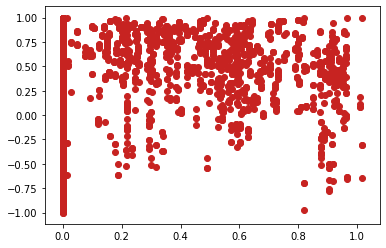

In [48]:
ds = results[results.param=='cor'].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

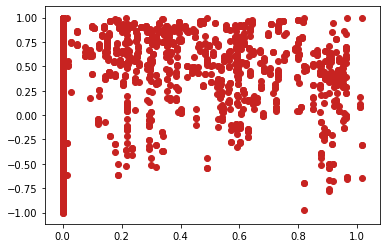

In [50]:
ds = results[(results.param=='cor')&(results.temp=='m')].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

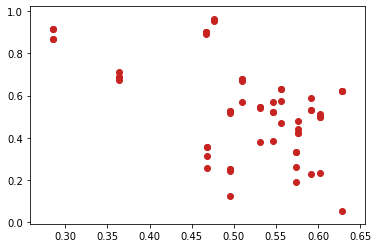

In [51]:
ds = results[(results.param=='cor')&(results.temp=='h')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

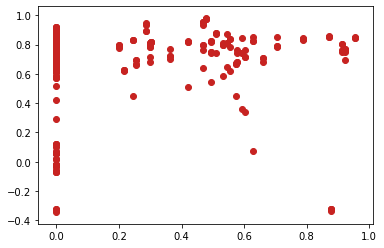

In [52]:
ds = results[(results.param=='cor')&(results.temp=='d')].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcaf105c50>,
      dtype=object)

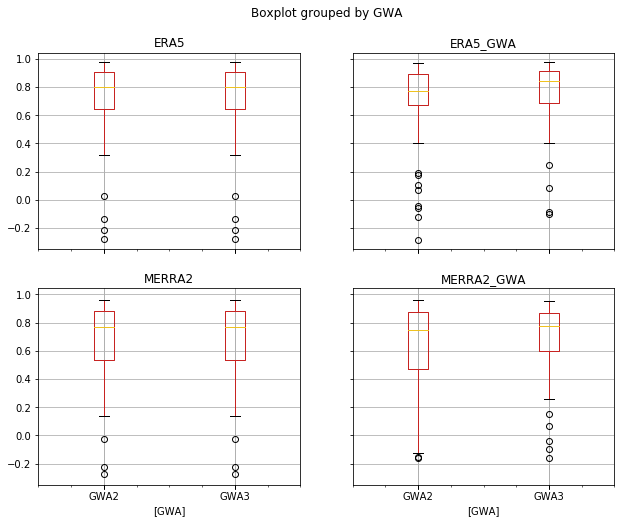

In [53]:
# boxplot GWA3 vs GWA2
ds = results[(results.param=='cor')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().boxplot(by='GWA',
                                                                                                        figsize=(10,8))

# RMSES

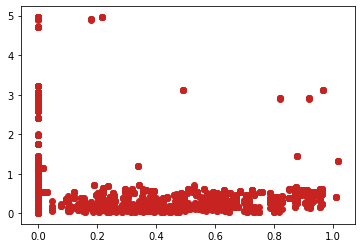

In [54]:
ds = results[results.param=='rmse'].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

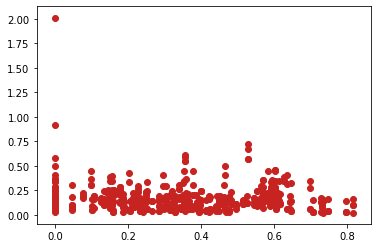

In [55]:
ds = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds.system_size,ds.value)

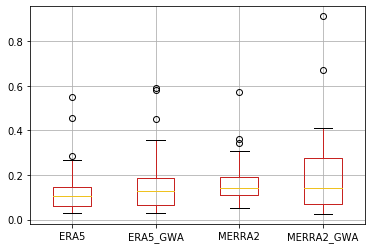

In [56]:
# boxplot GWA2
ds = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().loc['GWA2'].boxplot()

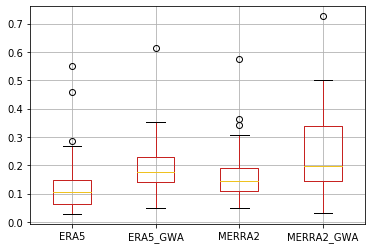

In [57]:
# boxplot GWA3 monthly data
ds = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().loc['GWA3'].boxplot()

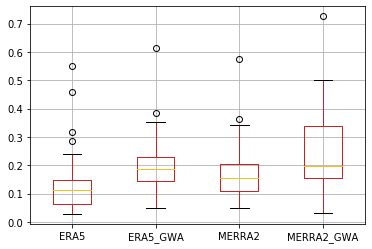

In [58]:
# boxplot GWA3
ds = results[(results.param=='rmse')&(results.scale!='park')].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().loc['GWA3'].boxplot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcaa7bd7b8>,
      dtype=object)

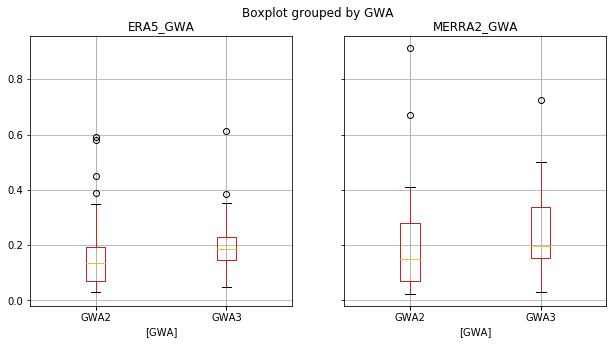

In [59]:
# boxplot GWA3 vs GWA2
ds = results[(results.param=='rmse')&(results.scale!='park')&((results.ds=='ERA5_GWA')|(results.ds=='MERRA2_GWA'))].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().boxplot(by='GWA',
                                                                                                        figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcaa6aaef0>,
      dtype=object)

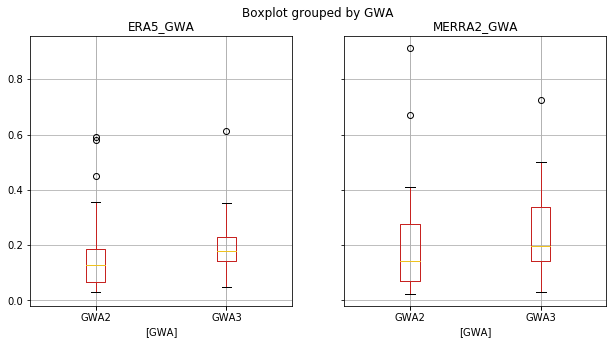

In [60]:
# boxplot GWA3 vs GWA2 monthly data
ds = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')&((results.ds=='ERA5_GWA')|(results.ds=='MERRA2_GWA'))].dropna(axis=0)
ds = ds[ds.value<2]
ds.drop(['temp','param','dataset',
         'corsize','system_size'],axis=1).groupby(['GWA','country',
                                                   'scale','region',
                                                   'ds'])['value'].aggregate('mean').unstack().boxplot(by='GWA',
                                                                                                        figsize=(10,5))

In [8]:
results = pd.read_pickle('/data/users/kgruber/results/results_USABRA.pkl')

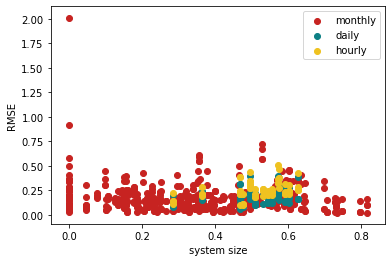

In [11]:
ds1 = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds2 = results[(results.param=='rmse')&(results.temp=='d')&(results.scale!='park')].dropna(axis=0)
ds3 = results[(results.param=='rmse')&(results.temp=='h')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds1.system_size,ds1.value,label='monthly')
plt.scatter(ds2.system_size,ds2.value,label='daily')
plt.scatter(ds3.system_size,ds3.value,label='hourly')
plt.xlabel('system size')
plt.ylabel('RMSE')
plt.legend()